# Tweet scraping

현재 중국 상하이에서 열리고 있는 2020롤드컵 결승에 진출한 DAMWON Gaming에 대한 tweet을 scrap

In [53]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import twitter

#API 키,토큰 생성
CONSUMER_KEY = 'KSl5I1Ta970LrFRo70RZJS6RC'
CONSUMER_SECRET = 'pumBJu35LoqJBXpRPc2iJq1aPWQj7lz8FbXa4MOC9xGZgOmEZn'
OAUTH_TOKEN = '900198409-n8jwPPp0PG40IuGvICBggDIBBxlQMVR4DYJChoVm'
OAUTH_TOKEN_SECRET = 'IH4llnqkvlqAOCvPijK3ByAm2iOrP5WMq5LKgwhoQXX1n'


auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

#DAMWON Gaming이 언급된 100개의 트윗 검색
search=twitter_api.search.tweets(q='DAMWON Gaming',count=100)

In [54]:
# 키값 확인
search.keys()

dict_keys(['statuses', 'search_metadata'])

In [55]:
statuses=search['statuses']

In [56]:
statuses

[{'created_at': 'Fri Oct 30 18:53:08 +0000 2020',
  'id': 1322250200426057729,
  'id_str': '1322250200426057729',
  'text': '@IntelGaming @yeeitsme_ DAMWON GAMING definitely going to win #DWGWIN',
  'truncated': False,
  'entities': {'hashtags': [{'text': 'DWGWIN', 'indices': [62, 69]}],
   'symbols': [],
   'user_mentions': [{'screen_name': 'IntelGaming',
     'name': 'Intel Gaming',
     'id': 414334713,
     'id_str': '414334713',
     'indices': [0, 12]},
    {'screen_name': 'yeeitsme_',
     'name': 'Jacqueline Yee',
     'id': 3278467519,
     'id_str': '3278467519',
     'indices': [13, 23]}],
   'urls': []},
  'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
  'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
  'in_reply_to_status_id': 1322248860987805696,
  'in_reply_to_status_id_str': '1322248860987805696',
  'in_reply_to_user_id': 414334713,
  'in_reply_to_user_id_str': '414334713',
  'in_reply_to_screen_name':

In [57]:
len(statuses)

100

In [58]:
#list형식으로된 statuses에서 favorite_count로 favorite수 확인,retweet_count로 리트윗수 확인

for i in range(len(statuses)):
    print(statuses[i]['text'])
    print('Number of Favorites: {}'.format(statuses[i]['favorite_count']))
    print('Number of Retweets: {}\n'.format(statuses[i]['retweet_count']))

@IntelGaming @yeeitsme_ DAMWON GAMING definitely going to win #DWGWIN
Number of Favorites: 0
Number of Retweets: 0

RT @lolesports: DAMWON Gaming vs Suning.

Only one will Take Over.

Tune in live for the #Worlds2020 Finals on October 31 starting at 3AM P…
Number of Favorites: 0
Number of Retweets: 509

RT @lolesports: DAMWON Gaming vs Suning.

Only one will Take Over.

Tune in live for the #Worlds2020 Finals on October 31 starting at 3AM P…
Number of Favorites: 0
Number of Retweets: 509

RT @culturageek: #Esports @lolesportsla @DamwonGaming @suning_gaming
-
#Worlds 2020: cómo y cuándo ver la final de #LOL entre #DamwonGaming…
Number of Favorites: 0
Number of Retweets: 1

RT @lolesports: DAMWON Gaming vs Suning.

Only one will Take Over.

Tune in live for the #Worlds2020 Finals on October 31 starting at 3AM P…
Number of Favorites: 0
Number of Retweets: 509

RT @lolesports: DAMWON Gaming vs Suning.

Only one will Take Over.

Tune in live for the #Worlds2020 Finals on October 31 starting

In [59]:
# DAMWON Gaming에 관한 text, screen_name, hashtag를 각각의 리스트에 저장

status_texts = [status['text'] for status in statuses]

screen_names = [user_mention['screen_name']
               for status in statuses
                   for user_mention in status['entities']['user_mentions']]

hashtags = [hashtag['text'] for status in statuses
               for hashtag in status['entities']['hashtags']]

In [60]:
print(screen_names)

['IntelGaming', 'yeeitsme_', 'lolesports', 'lolesports', 'culturageek', 'lolesportsla', 'DamwonGaming', 'suning_gaming', 'lolesports', 'lolesports', 'lolesportsla', 'DamwonGaming', 'suning_gaming', 'lolesportsla', 'DamwonGaming', 'suning_gaming', 'Bynjee', 'lolesports', 'lolesports', 'mfreak00', 'DamwonGaming', 'suning_gaming', 'lolesports', 'lolesports', 'mfreak00', 'DamwonGaming', 'suning_gaming', 'lolesports', 'mfreak00', 'DamwonGaming', 'suning_gaming', 'Telekom_zockt', 'lolesports', 'lolesports', 'lolesports', 'Funk1ll3rMG', 'Bose', 'lolesports', 'lolesports', 'mfreak00', 'DamwonGaming', 'suning_gaming', 'DamwonGaming', 'lolesports', 'lolesports', 'Bose', 'lolesports', 'lolesports', 'lolesports', 'lolesports', 'vellosim', 'lolesports', 'Unclenay95', 'suning_gaming', 'LPL_RNG', 'Inter_en', 'DamwonGaming', 'lolesports', 'FionnOnFire', 'lolesports', 'mfreak00', 'DamwonGaming', 'suning_gaming', 'lolesports', 'BitSler', 'BitSler', 'DamwonGaming', 'SNG_lol', 'visibrain', 'lolesports', '

In [61]:
print(hashtags)

['DWGWIN', 'Worlds2020', 'Worlds2020', 'Esports', 'Worlds', 'LOL', 'DamwonGaming', 'Worlds2020', 'Worlds2020', 'Esports', 'Worlds', 'LOL', 'Esports', 'Worlds', 'LOL', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'LOL', 'Worlds2020', 'LeagueOfLegends', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'ArtofLegends', 'Worlds2020', 'SNWIN', 'DWGWIN', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'ArtofLegends', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'KDA', 'Worlds2020', 'Worlds2020', 'Worlds2020', 'Worlds

In [62]:
print(status_texts)

['@IntelGaming @yeeitsme_ DAMWON GAMING definitely going to win #DWGWIN', 'RT @lolesports: DAMWON Gaming vs Suning.\n\nOnly one will Take Over.\n\nTune in live for the #Worlds2020 Finals on October 31 starting at 3AM P…', 'RT @lolesports: DAMWON Gaming vs Suning.\n\nOnly one will Take Over.\n\nTune in live for the #Worlds2020 Finals on October 31 starting at 3AM P…', 'RT @culturageek: #Esports @lolesportsla @DamwonGaming @suning_gaming\n-\n#Worlds 2020: cómo y cuándo ver la final de #LOL entre #DamwonGaming…', 'RT @lolesports: DAMWON Gaming vs Suning.\n\nOnly one will Take Over.\n\nTune in live for the #Worlds2020 Finals on October 31 starting at 3AM P…', 'RT @lolesports: DAMWON Gaming vs Suning.\n\nOnly one will Take Over.\n\nTune in live for the #Worlds2020 Finals on October 31 starting at 3AM P…', '#Esports @lolesportsla @DamwonGaming @suning_gaming\n-\n#Worlds 2020: cómo y cuándo ver la final de #LOL entre… https://t.co/BTQrx4JI24', '#Esports @lolesportsla @DamwonGaming @suning_gam

## Text Vectorisation
텍스트 벡터화에  Count Vectorizer, TF-IDF 두 가지 방법을 사용하였다.

### Count Vectorizer
Count Vectorizer은 단순히 단어 출현 횟수를 카운팅한 벡터로 조사, 관사 등 의미없는 단어를 색출 할 수 없다.

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
x = vectorizer.fit_transform(status_texts)

# 해당 단어는 언급되어진 단어들이다.
print(vectorizer.get_feature_names())

['07h00', '0x60pg0fwt', '10', '11h', '2020', '24', '24h', '2cgec5awly', '2leytcpbql', '31', '3am', '3sa7ejhcxg', '4xlnawnznz', '5kxdxjmmrw', '88ukwsbsgk', 'a7onirillt', 'ad', 'aguante', 'all', 'amanhã', 'an', 'and', 'andando', 'are', 'article', 'artoflegends', 'as', 'at', 'auf', 'augurar', 'avantage', 'avavcbi3zr', 'aí', 'bbbelcwmen', 'bbg7lonrqy', 'beat', 'begin', 'best', 'better', 'between', 'bitsler', 'blood', 'bmpndou0gg', 'bose', 'btqrx4ji24', 'bynjee', 'campeon', 'championship', 'chan', 'chaqueta', 'check', 'cheer', 'co', 'come', 'comment', 'comms', 'compositions', 'contra', 'coupe', 'cuethskqtl', 'culturageek', 'cuándo', 'cómo', 'd3ikrqzdei', 'da', 'dam', 'damwon', 'damwongaming', 'das', 'de', 'definitely', 'del', 'demain', 'deugemotwo', 'deus', 'didn', 'different', 'dla', 'do', 'doczekaliśmy', 'dovrebbero', 'du', 'dwgwin', 'ehjiherxmt', 'el', 'en', 'entre', 'es', 'esa', 'esports', 'essere', 'estamos', 'et', 'etc', 'even', 'face', 'fan', 'final', 'finale', 'finals', 'finał', 'fi

In [64]:
# 단어들의 벡터값으로 표현한 것

print(x.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


### TF-IDF

TF-IDF는 기존 Count Vectorizer의 한계를 해결한 방법으로 단순히 많이 등장하는 빈도로 단어의 가치를 정하는 것이 아니라 다수의 문서에서 단어가 많이 등장하는 단어에게는 일종의 패널티를 주고 소수의 문서에 많이 등장하는 단어에는 advantage를 주어 단어 빈도의 스케일을 맞춰준다. 즉 조사, 관사 등 의미없는 단어를 걸러낼 수 있다.

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

v=vectorizer.fit_transform(status_texts)

In [66]:
# 사용된 단어

print(vectorizer.vocabulary_)

{'intelgaming': 125, 'yeeitsme_': 284, 'damwon': 66, 'gaming': 105, 'definitely': 70, 'going': 111, 'to': 240, 'win': 273, 'dwgwin': 82, 'rt': 198, 'lolesports': 151, 'vs': 262, 'suning': 221, 'only': 177, 'one': 176, 'will': 272, 'take': 224, 'over': 181, 'tune': 242, 'in': 123, 'live': 148, 'for': 102, 'the': 232, 'worlds2020': 278, 'finals': 99, 'on': 175, 'october': 172, '31': 9, 'starting': 217, 'at': 27, '3am': 10, 'culturageek': 60, 'esports': 89, 'lolesportsla': 153, 'damwongaming': 67, 'suning_gaming': 222, 'worlds': 277, '2020': 4, 'cómo': 62, 'cuándo': 61, 'ver': 252, 'la': 139, 'final': 97, 'de': 69, 'lol': 150, 'entre': 86, 'https': 121, 'co': 52, 'btqrx4ji24': 44, 'd3ikrqzdei': 63, 'bynjee': 45, 'world': 276, 'preview': 190, 'infographics': 124, '0x60pg0fwt': 1, 'mfreak00': 163, 'si': 205, 'gana': 106, 'contra': 57, 'voy': 261, 'sortear': 214, 'chaqueta': 49, 'que': 193, 'han': 116, 'usado': 249, 'en': 85, 'el': 84, 'all': 18, 'tension': 230, 'teamfights': 226, 'blood': 4

In [67]:
# 단어의 idf 값

print(vectorizer.idf_)

[4.92197334 4.22882616 4.92197334 4.92197334 3.66921037 4.51650823
 4.92197334 4.92197334 4.92197334 1.62613647 1.6448286  4.92197334
 4.92197334 4.92197334 4.92197334 4.92197334 4.92197334 4.92197334
 4.51650823 4.92197334 4.92197334 3.66921037 4.92197334 4.51650823
 4.92197334 4.51650823 4.51650823 1.6448286  4.51650823 4.92197334
 4.51650823 4.92197334 4.92197334 4.92197334 4.92197334 4.92197334
 4.51650823 4.22882616 4.92197334 4.22882616 4.51650823 4.92197334
 4.92197334 3.53567898 4.92197334 4.22882616 4.92197334 4.0056826
 4.51650823 3.66921037 4.92197334 4.92197334 2.31928365 4.92197334
 4.92197334 4.51650823 4.92197334 3.66921037 4.92197334 4.92197334
 4.92197334 4.22882616 4.0056826  4.92197334 4.92197334 4.92197334
 1.10426101 2.78190717 4.51650823 3.05017116 4.92197334 4.51650823
 4.51650823 4.92197334 4.92197334 4.92197334 4.92197334 4.92197334
 4.92197334 4.92197334 4.92197334 4.92197334 4.51650823 4.92197334
 3.53567898 3.66921037 4.0056826  4.92197334 4.92197334 4.22882

In [68]:
# 100개의 문장에 223개의 단어를 색출 하였다.

print(v.shape)

(100, 290)


## Word Cloud

단어 빈도수가 많으면 글자 크기가 커지고, 빈도수가 적으면 작게 한다. 단어 시각화이다.

In [69]:
# join을 사용하여 단어들을 ,로 묶었다.

status_text = ', '.join(status_texts)

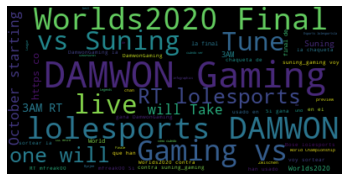

In [70]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud().generate(status_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

- DAMWON Gaming, worlds 2020 FInal, VS Suning이 가장 크게 보이므로 단어 빈도가 많다는 것을 알 수 있다.

# Accessing User Information

미국 대선 대통령 후보(도널드 트럼프, 조 바이든, 하위 호킨스)와 부대통령 후보(마이크 펜스, 카멀라 해리스) 총 5의 트윗계정정보 검색

In [71]:
account_1 = twitter_api.users.lookup(screen_name='realDonaldTrump')
account_2 = twitter_api.users.lookup(screen_name='JoeBiden')
account_3 = twitter_api.users.lookup(screen_name='HowieHawkins')
account_4 = twitter_api.users.lookup(screen_name='Mike_Pence')
account_5 = twitter_api.users.lookup(screen_name='KamalaHarris')

In [72]:
print(account_1)

[{'id': 25073877, 'id_str': '25073877', 'name': 'Donald J. Trump', 'screen_name': 'realDonaldTrump', 'location': 'Washington, DC', 'description': '45th President of the United States of America🇺🇸', 'url': 'https://t.co/8f9VFxztEJ', 'entities': {'url': {'urls': [{'url': 'https://t.co/8f9VFxztEJ', 'expanded_url': 'http://Vote.DonaldJTrump.com', 'display_url': 'Vote.DonaldJTrump.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 87363406, 'friends_count': 50, 'listed_count': 121814, 'created_at': 'Wed Mar 18 13:46:38 +0000 2009', 'favourites_count': 6, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 57849, 'lang': None, 'status': {'created_at': 'Fri Oct 30 18:54:19 +0000 2020', 'id': 1322250495516311552, 'id_str': '1322250495516311552', 'text': 'https://t.co/BlMv2KsM7W', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 132224463024

In [73]:
account_list=[]

account_list.append(account_1)
account_list.append(account_2)
account_list.append(account_3)
account_list.append(account_4)
account_list.append(account_5)

# 각 계정의 name, description, follwer_count 정보 추출
# sep으로 각 정보마다 한줄 띄고 end로 for문마다 두줄씩 띔

for a in account_list:
    print(a[0]['name'], a[0]['description'],a[0]['followers_count'],sep='\n',end='\n\n')

Donald J. Trump
45th President of the United States of America🇺🇸
87363406

Joe Biden
Senator, Vice President, 2020 candidate for President of the United States, husband to @DrBiden, proud father & grandfather. Loves ice cream, aviators & @Amtrak
11704952

Howie Hawkins
2020 Green Party nominee for President, running w/ @AngelaNWalker.

Help build the Green New Deal today: https://t.co/8wKzB9BxF8

Tweets by staff.
64307

Mike Pence
Vice President of the United States
5496595

Kamala Harris
U.S. Senator and Democratic candidate for Vice President of the United States. Wife, Momala, Auntie. Fighting for the people. She/her.
7013477



# Getting User Tweet

미국 대선 대통령 후보(도널드 트럼프, 조 바이든, 하위 호킨스)와 부대통령 후보(마이크 펜스, 카멀라 해리스) 총 5의 트윗 내용 30개씩 검색

In [74]:
tweet_1 = twitter_api.statuses.user_timeline(screen_name='realDonaldTrump', count=30)
tweet_2 = twitter_api.statuses.user_timeline(screen_name='JoeBiden', count=30)
tweet_3 = twitter_api.statuses.user_timeline(screen_name='HowieHawkins', count=30)
tweet_4 = twitter_api.statuses.user_timeline(screen_name='Mike_Pence', count=30)
tweet_5 = twitter_api.statuses.user_timeline(screen_name='KamalaHarris', count=30)

In [75]:
print(tweet_1)

[{'created_at': 'Fri Oct 30 18:54:19 +0000 2020', 'id': 1322250495516311552, 'id_str': '1322250495516311552', 'text': 'https://t.co/BlMv2KsM7W', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1322244630247804928, 'id_str': '1322244630247804928', 'indices': [0, 23], 'media_url': 'http://pbs.twimg.com/amplify_video_thumb/1322244630247804928/img/JN5tOTBSEg2vgXLu.jpg', 'media_url_https': 'https://pbs.twimg.com/amplify_video_thumb/1322244630247804928/img/JN5tOTBSEg2vgXLu.jpg', 'url': 'https://t.co/BlMv2KsM7W', 'display_url': 'pic.twitter.com/BlMv2KsM7W', 'expanded_url': 'https://twitter.com/TeamTrump/status/1322245263881326594/video/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1200, 'h': 675, 'resize': 'fit'}, 'small': {'w': 680, 'h': 383, 'resize': 'fit'}, 'large': {'w': 1280, 'h': 720, 'resize': 'fit'}}, 'source_status_id': 1322245263881326594, 'source_status_id_str': '132

In [76]:
tweet_list=[]

user_texts1 = [status['text'] for status in tweet_1]
tweet_list.append(user_texts1)
user_texts2 = [status['text'] for status in tweet_2]
tweet_list.append(user_texts2)
user_texts3 = [status['text'] for status in tweet_3]
tweet_list.append(user_texts3)
user_texts4 = [status['text'] for status in tweet_4]
tweet_list.append(user_texts4)
user_texts5 = [status['text'] for status in tweet_5]
tweet_list.append(user_texts5)

In [77]:
# 총인물 5명이 맞는지 확인

print(len(tweet_list))

5


In [78]:
# 인물별 트윗 30개씩인지 확인

for i in range(5):
    print(len(tweet_list[i]))

30
30
30
30
30


In [79]:
# 인물별 트윗 내용 확인, end로 for문마다 두줄씩 띔

for a in tweet_list:
    print(a,end='\n\n')

['https://t.co/BlMv2KsM7W', 'THANK YOU MICHIGAN! https://t.co/eTip7kTQXJ', 'On my way to MICHIGAN, WISCONSIN, and MINNESOTA! https://t.co/7eEpmAJKCO', 'RT @TeamTrump: First Lady Melania Trump: “We are a country of hope, not a country of fear or weakness.” https://t.co/9n1841cdA6', 'RT @FLOTUS: Thank you @FtBraggNC for hosting another impressive visit to your base yesterday! @POTUS @realDonaldTrump and I are grateful to…', 'RT @GOP: “We are a country of hope, not a country of fear or weakness.” -@FLOTUS', 'RT @GOP: .@realDonaldTrump is committed to fighting for the Hispanic Community.\n \nHis policies help small businesses grow, household income…', 'RT @GOPChairwoman: The media’s silence and lack of reporting about Biden’s pay-for-play scheme with China is ridiculous. https://t.co/cX1ck…', 'Biden would lock us down forever. We are rounding the corner! https://t.co/zvSfKUo1gd', 'RT @GOP: Pres. Trump made progress in the Middle East where no POTUS could!\n\nCNN’s Oren Liebermann: The Isra

## Count Vectorizer

In [80]:
# Count Vector 단어 확인

for a in tweet_list:
    vectorizer = CountVectorizer()
    x = vectorizer.fit_transform(a)
    print(vectorizer.get_feature_names(),end='\n\n')

['000', '0hvmzsnwuz', '160m', '33', '3rd', '5m', '7eepmajkco', '9n1841cda6', 'about', 'admits', 'am', 'amendment', 'america', 'amp', 'and', 'another', 'aocgusqotu', 'are', 'at', 'back', 'bad', 'base', 'be', 'believes', 'best', 'better', 'biden', 'biggest', 'birthday', 'blmv2ksm7w', 'brett', 'businesses', 'but', 'ca', 'can', 'ccarrgop', 'champion', 'charlotte', 'chicago', 'china', 'cnn', 'co', 'committed', 'community', 'condemn', 'consider', 'contacts', 'continue', 'corner', 'could', 'country', 'court', 'covid', 'crazy', 'cx1ck', 'day', 'days', 'deal', 'decision', 'detroit', 'door', 'down', 'du', 'during', 'east', 'efforts', 'elected', 'election', 'endorsement', 'esogtfofco', 'etip7ktqxj', 'ever', 'faith', 'faster', 'fear', 'fighting', 'final', 'first', 'five', 'fjftlwlw5m', 'flint', 'flotus', 'for', 'forever', 'forgotten', 'fourmoreyears', 'ftbraggnc', 'game', 'gdp', 'getting', 'given', 'go', 'gop', 'gopchairwoman', 'grab', 'grassroots', 'grateful', 'great', 'greater', 'gross', 'ground

## TF-IDF

In [81]:
# 인물별 TF-IDF 단어 확인

for a in tweet_list:
    vectorizer = TfidfVectorizer()
    vectorizer.fit(a)
    print(vectorizer.vocabulary_,end='\n\n')

{'https': 114, 'co': 41, 'blmv2ksm7w': 29, 'thank': 212, 'you': 250, 'michigan': 143, 'etip7ktqxj': 70, 'on': 161, 'my': 149, 'way': 233, 'to': 218, 'wisconsin': 242, 'and': 14, 'minnesota': 146, '7eepmajkco': 6, 'rt': 196, 'teamtrump': 209, 'first': 77, 'lady': 129, 'melania': 141, 'trump': 219, 'we': 234, 'are': 17, 'country': 50, 'of': 160, 'hope': 111, 'not': 155, 'fear': 74, 'or': 165, 'weakness': 235, '9n1841cda6': 7, 'flotus': 81, 'ftbraggnc': 86, 'for': 82, 'hosting': 112, 'another': 15, 'impressive': 118, 'visit': 227, 'your': 251, 'base': 21, 'yesterday': 249, 'potus': 179, 'realdonaldtrump': 188, 'grateful': 96, 'gop': 92, 'is': 122, 'committed': 42, 'fighting': 75, 'the': 214, 'hispanic': 108, 'community': 43, 'his': 107, 'policies': 178, 'help': 105, 'small': 201, 'businesses': 31, 'grow': 101, 'household': 113, 'income': 120, 'gopchairwoman': 93, 'media': 140, 'silence': 200, 'lack': 128, 'reporting': 191, 'about': 8, 'biden': 26, 'pay': 170, 'play': 176, 'scheme': 197, '

In [82]:
# 각 인물별 TF-IDF 벡터 shape 확인으로 단어 갯수 확인

for a in tweet_list:
    vectorizer = TfidfVectorizer()
    vectorizer.fit(a)
    v= vectorizer.transform([a[0]])
    print(v.shape)

(1, 253)
(1, 318)
(1, 293)
(1, 227)
(1, 295)


## Word Cloud

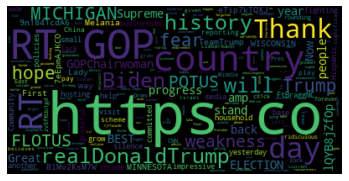

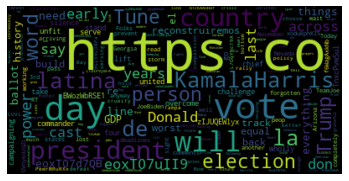

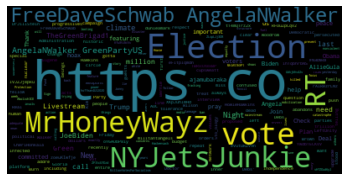

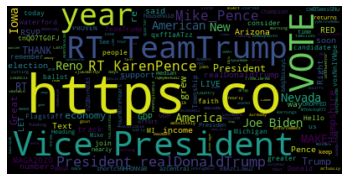

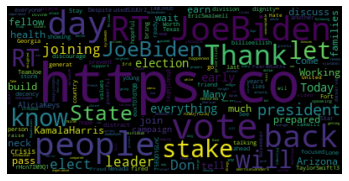

In [83]:
# 인물별 word cloud

for a in tweet_list:
    user_combined = ', '.join(a)
    wordcloud = WordCloud().generate(user_combined)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

- 도널드 트럼프는 Country, Biden,GOP, history가 많이 언급됨을 알 수 있다.
- 조 바이든은 vote, day, ballot,election, latina가 많이 언급됨을 알 수 있다.
- 하위 호킨스는 NYJetsJunkie, election, MrHoneyWayz가 많이 언급됨을 알 수 있다.
- 마이크 펜스는 teamTrump, realDonaldTrump, vicepresident가 많이 언급되었다.
- 카멀라 해리스는 JoeBiden, people, Thank, back이 많이 언급되었다.

# 문제 해결 과정 및 결론

- 트윗을 스크래핑하면서 코딩 중간중간에 주석으로 어떻게 코딩을 하였는지, 문제 해결과정을 설명하였다.
- 벡터화할때 트윗내용에서 id,@ 등 특수문자 제거, 불용어(stopword)제거, 어간추출(stemwmer)을 하여 전처리를 한 뒤 벡터화 및 word cloud를 한다면 훨씬 더 명확하고 정확한 결과가 나왔을 것이다.